In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Описание данных

**user_data:**
* client – идентификатор пользователя
* premium – является ли клиент премиум
* age – возраст

**logs:**
* client – идентификатор пользователя
* success – результат (успех - 1, нет - 0)
* platform – платформа
* time – время в формате Unix

In [4]:
user_data = pd.read_csv('C:/work/Datasets/KarpovCourses/user_data.csv')
logs = pd.read_csv('C:/work/Datasets/KarpovCourses/logs.csv')

In [5]:
user_data.shape

(2954, 3)

In [7]:
# типы данных
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [6]:
# проверка на пустые значения
user_data.isnull().sum()

client     0
premium    0
age        0
dtype: int64

In [9]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [10]:
logs.shape

(4500, 4)

In [11]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [12]:
logs.isnull().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [13]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [14]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [15]:
logs.platform.nunique()

3

In [20]:
client_success = (
    logs[logs.success == True]
    .groupby('client', as_index=False)
    .agg({'success': 'count'})
    .sort_values('success', ascending=False)
)

In [28]:
client_success

,client,success
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [32]:
list_client = client_success[client_success.success == 41] \
.sort_values('client')

list(list_client.client)

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [37]:
(
    logs[logs.success == True]
    .groupby('platform', as_index=False)
    .agg({'success': 'count'})
    .sort_values('success', ascending=False)
)

,platform,success
1,phone,2019
0,computer,1090
2,tablet,180


In [24]:
client_success.success.value_counts()

1     2791
2       43
41       9
3        1
40       1
Name: success, dtype: int64

In [40]:
full_data = user_data.merge(logs, on='client')

In [41]:
full_data.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [47]:
(
    full_data[full_data.premium == True]
    .groupby('platform', as_index=False)
    .agg({'client': 'count'})
    .sort_values('client', ascending=False)
)

,platform,client
1,phone,246
0,computer,150
2,tablet,24


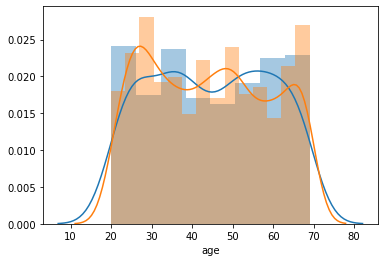

In [54]:
sns.distplot(full_data[full_data.premium == True].age)
sns.distplot(full_data[full_data.premium == False].age)

In [62]:
full_data_success = (
    full_data[full_data.success == True]
    .groupby('client', as_index=False)
    .agg({'success': 'count'})
)

In [63]:
full_data_success.head()

,client,success
0,40,1
1,75,1
2,81,1
3,132,1
4,164,1


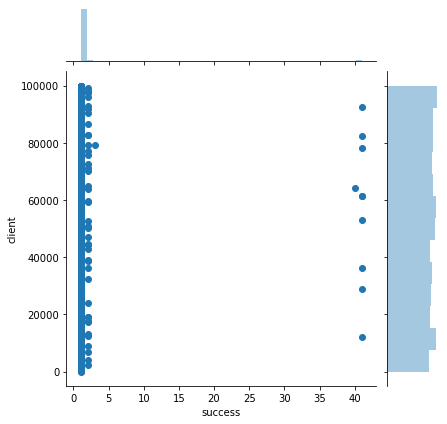

In [65]:
sns.jointplot(x='success', y='client', data=full_data_success, kind='scatter')

In [86]:
full_data_success_age = (
    full_data[(full_data.success == True) & (full_data.platform == 'computer')]
    #.groupby('age', as_index=False)
    #.agg({'success': 'count'})
    #.sort_values('success', ascending=False)
    )

In [87]:
full_data_success_age.head()

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108


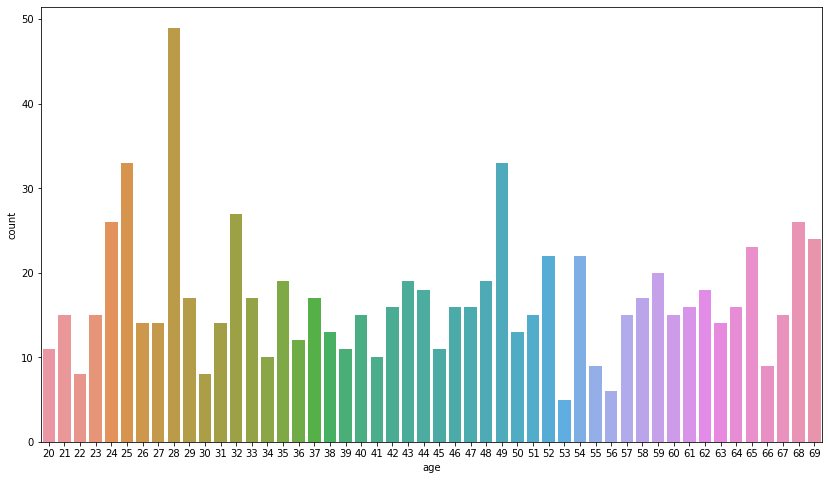

In [100]:
plt.rcParams['figure.figsize']=(14,8)
sns.countplot(x='age', data=full_data[(full_data.success == True) & (full_data.platform == 'computer')])